In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

data_url = "Housing.csv"
df = pd.read_csv(data_url)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [33]:
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop(columns=["price"])
y = df_encoded["price"]

X

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,2910,3,1,1,0,False,False,False,False,False,False,False,False


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=480)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((436, 13), (109, 13), (436,), (109,))

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [36]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


MAE: 722301.65
MSE: 914716393834.61
R^2 Score: 0.71


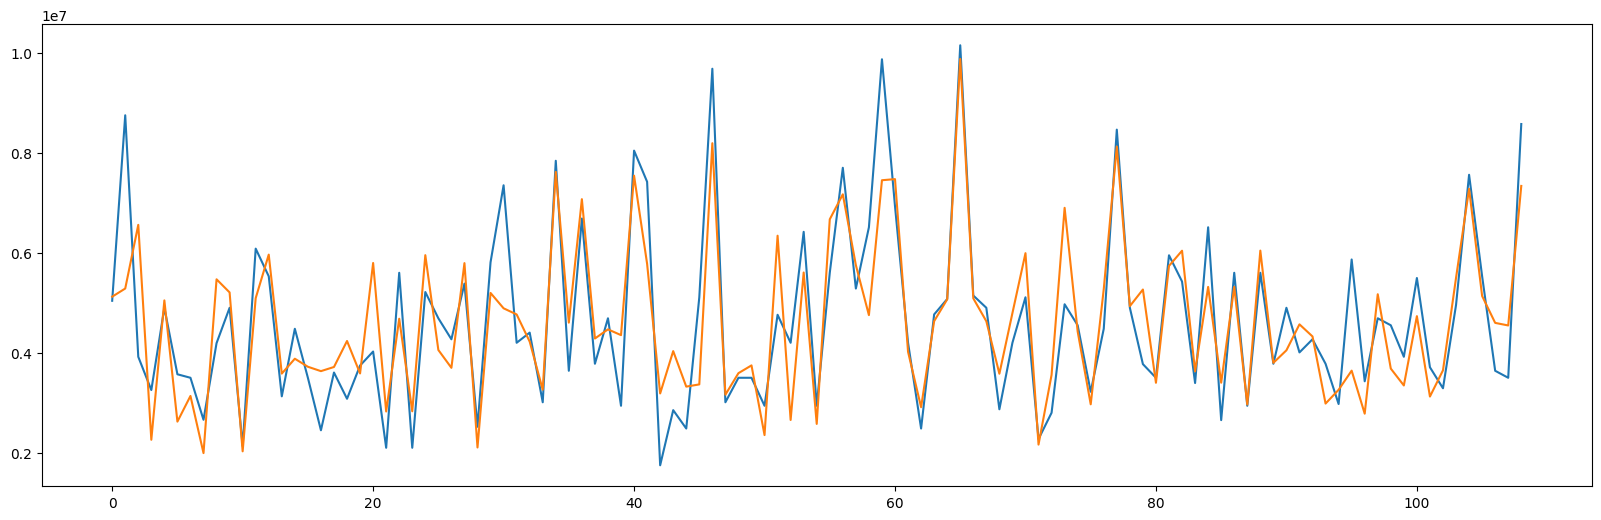

In [37]:
plt.figure(figsize=(20, 6))
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_pred)), y_pred)
plt.show()